In [1]:
# Importando libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Lendo os datas sets com pandas
df_obesidade = pd.read_csv('./datasets/obesidade/data.csv', sep=',', index_col=0)
df_obesidade_cleaned = pd.read_csv('./datasets/obesidade/obesity-cleaned.csv', sep=',', index_col=0)
df_pib = pd.read_csv('./datasets/pib_per_capita/GDP.csv', sep=',', index_col=0)

# Percentual médio de obesidade por sexo na américa do norte no ano de 2010

In [17]:
# Filtrando data set de obesidade com base no ano de 2010 e países desejados

paises_desejados = ['Mexico', 'Canada', 'United States of America']
df_obesidade_filtrado = df_obesidade_cleaned[(df_obesidade_cleaned['Year'] == 2010) & (df_obesidade_cleaned['Country'].isin(paises_desejados))]
df_obesidade_filtrado

,Country,Year,Obesity (%),Sex
4011,Canada,2010,26.0 [23.2-28.9],Both sexes
4012,Canada,2010,25.8 [21.8-30.1],Male
4013,Canada,2010,26.2 [22.4-30.2],Female
13965,Mexico,2010,25.8 [23.1-28.6],Both sexes
13966,Mexico,2010,21.1 [17.5-25.0],Male
13967,Mexico,2010,29.8 [25.8-33.9],Female
23541,United States of America,2010,32.3 [29.6-35.1],Both sexes
23542,United States of America,2010,31.2 [27.4-35.3],Male
23543,United States of America,2010,33.3 [29.6-37.1],Female


In [19]:
# Está função transformar a str de percentual em porcentagem float 
def quebra_porcentagem(obesity_str):
    return float(obesity_str.split('')[0])

# Cria uma coluna 'Media' com a função sendo aplicada 
df_obesidade_filtrado.loc[:, 'Media'] = df_obesidade_filtrado['Obesity (%)'].apply(quebra_porcentagem)
# Tirando a media de obesidade por sexo
media = df_obesidade_filtrado.groupby(['Sex'])['Media'].mean()
round(media, 2)

Sex
Both sexes    28.03
Female        29.77
Male          26.03
Name: Media, dtype: float64

# Top 3 com maior e menor taxa de aumento de índices de obesidade nesse período de 2010 e em 2016

In [36]:
df_obesidade_2010 = df_obesidade_cleaned[(df_obesidade_cleaned['Year'] == 2010) & (df_obesidade_cleaned['Obesity (%)'] != 'No data')]
df_obesidade_2010

,Country,Year,Obesity (%),Sex
105,Afghanistan,2010,4.0 [2.5-5.9],Both sexes
106,Afghanistan,2010,2.2 [1.0-4.4],Male
107,Afghanistan,2010,5.7 [3.3-9.2],Female
231,Albania,2010,18.2 [14.3-22.3],Both sexes
232,Albania,2010,17.4 [12.0-23.7],Male
...,...,...,...,...
24424,Zambia,2010,2.6 [1.2-4.6],Male
24425,Zambia,2010,9.8 [6.9-13.3],Female
24549,Zimbabwe,2010,13.8 [11.0-16.8],Both sexes
24550,Zimbabwe,2010,3.7 [2.1-6.1],Male


In [99]:
def quebra_porcentagem(obesity_str):
    return float(obesity_str.split()[0])

df_obesidade_2010.loc[:,'Media'] = df_obesidade_2010.loc[:,'Obesity (%)'].apply(quebra_porcentagem)
df_obesidade_2010.sort_values('Media', ascending=False).head(3)
# df_obesidade_2010.sort_values('Media', ascending=False).tail(3)

,Country,Year,Obesity (%),Sex,Media
15101,Nauru,2010,61.9 [55.3-68.2],Female,61.9
15099,Nauru,2010,58.9 [54.2-63.6],Both sexes,58.9
5021,Cook Islands,2010,56.7 [49.4-63.6],Female,56.7


In [79]:
df_obesidade_2016 = df_obesidade_cleaned[(df_obesidade_cleaned.loc[:,'Year'] == 2016) & (df_obesidade_cleaned.loc[:,'Obesity (%)'] != 'No data')]
df_obesidade_2016.loc[:,'Obesity (%)'] = df_obesidade_2016.loc[:,'Obesity (%)'].apply(quebra_porcentagem)


maior_valor_2016 = df_obesidade_2016.sort_values('Obesity (%)', ascending=False).head(3)
menor_valor_2016 = df_obesidade_2016.sort_values('Obesity (%)', ascending=False).tail(3)
maior_valor_2016


,Country,Year,Obesity (%),Sex
15119,Nauru,2016,63.3,Female
15117,Nauru,2016,61.0,Both sexes
5039,Cook Islands,2016,59.2,Female


# E os top 3 com maior e menor taxa de aumento de índices de obesidade no período completo, até o último registro

In [80]:
df_obesidade_completo = df_obesidade_cleaned[df_obesidade_cleaned.loc[:,'Obesity (%)'] != 'No data']
df_obesidade_completo.loc[:,'Obesity (%)'] = df_obesidade_completo.loc[:,'Obesity (%)'].apply(quebra_porcentagem)
maior_valor_completo = df_obesidade_completo.sort_values('Obesity (%)', ascending=False).head(3)
menor_valor_completo = df_obesidade_completo.sort_values('Obesity (%)', ascending=False).tail(3)
menor_valor_completo

,Country,Year,Obesity (%),Sex
24097,Viet Nam,1985,0.1,Male
21805,Timor-Leste,1977,0.1,Male
1645,Bangladesh,1977,0.1,Male


# Extraia o máximo de informação possível sobre o Brasil. (O que julga ser importante sobre esse dataset? Use gráficos e apresente.)

In [151]:
df_obesidade_brasil = df_obesidade_cleaned[df_obesidade_cleaned.loc[:, 'Country'] == 'Brazil']

df_obesidade_brasil.loc[:,'Obesity (%)'] = df_obesidade_brasil.loc[:,'Obesity (%)'].apply(quebra_porcentagem)

df_obesidade_brasil

,Country,Year,Obesity (%),Sex
2898,Brazil,1975,5.2,Both sexes
2899,Brazil,1975,3.0,Male
2900,Brazil,1975,7.3,Female
2901,Brazil,1976,5.5,Both sexes
2902,Brazil,1976,3.2,Male
...,...,...,...,...
3019,Brazil,2015,18.0,Male
3020,Brazil,2015,24.9,Female
3021,Brazil,2016,22.1,Both sexes
3022,Brazil,2016,18.5,Male


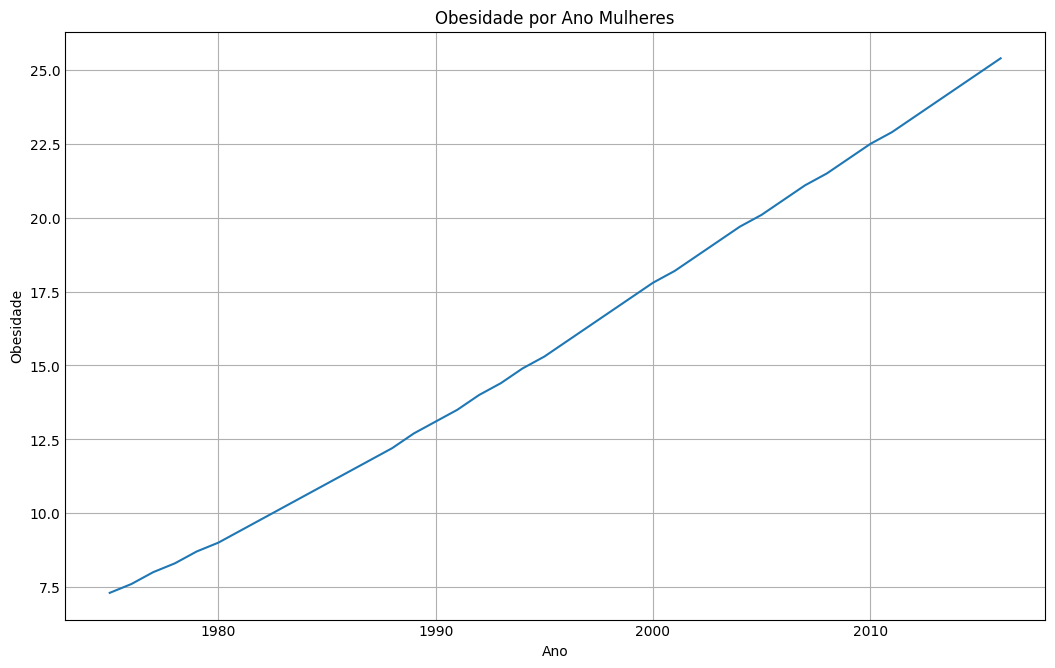

In [156]:
df_obesidade_brasil_mulher = df_obesidade_brasil[df_obesidade_brasil.loc[:,'Sex'] == 'Female']
plt.figure(figsize=(10, 6))
plt.plot(df_obesidade_brasil_mulher["Year"], df_obesidade_brasil_mulher["Obesity (%)"])
plt.title("Obesidade por Ano Mulheres")
plt.xlabel("Ano")
plt.ylabel("Obesidade")
plt.grid(True)
plt.show()  


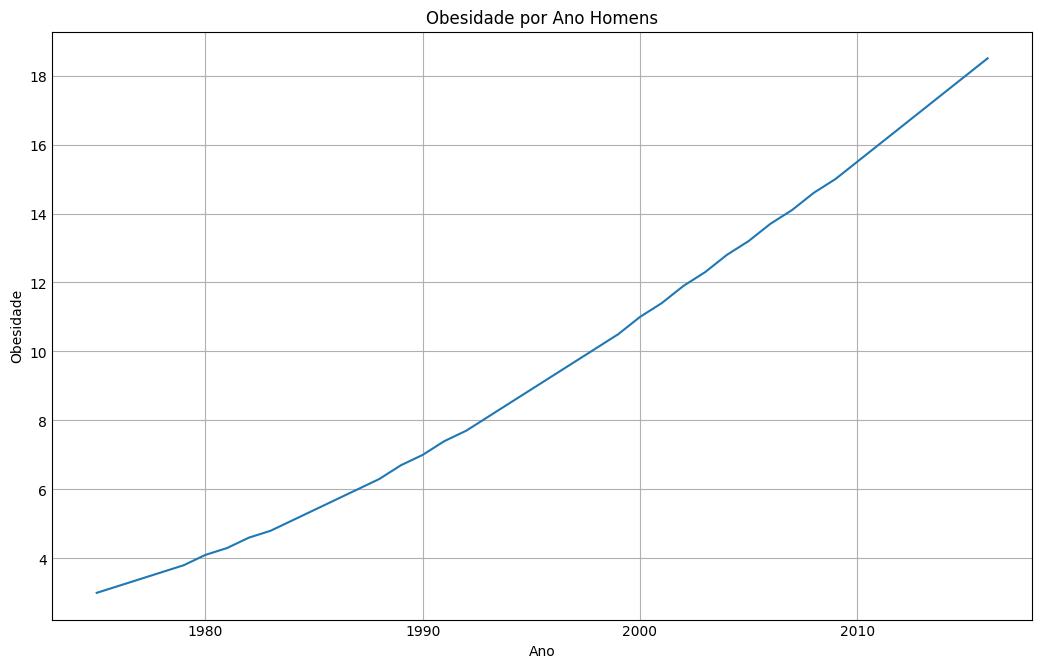

In [158]:
df_obesidade_brasil_homem = df_obesidade_brasil[df_obesidade_brasil.loc[:,'Sex'] == 'Male']
plt.figure(figsize=(10, 6))
plt.plot(df_obesidade_brasil_homem["Year"], df_obesidade_brasil_homem["Obesity (%)"])
plt.title("Obesidade por Ano Homens")
plt.xlabel("Ano")
plt.ylabel("Obesidade")
plt.grid(True)
plt.show()  



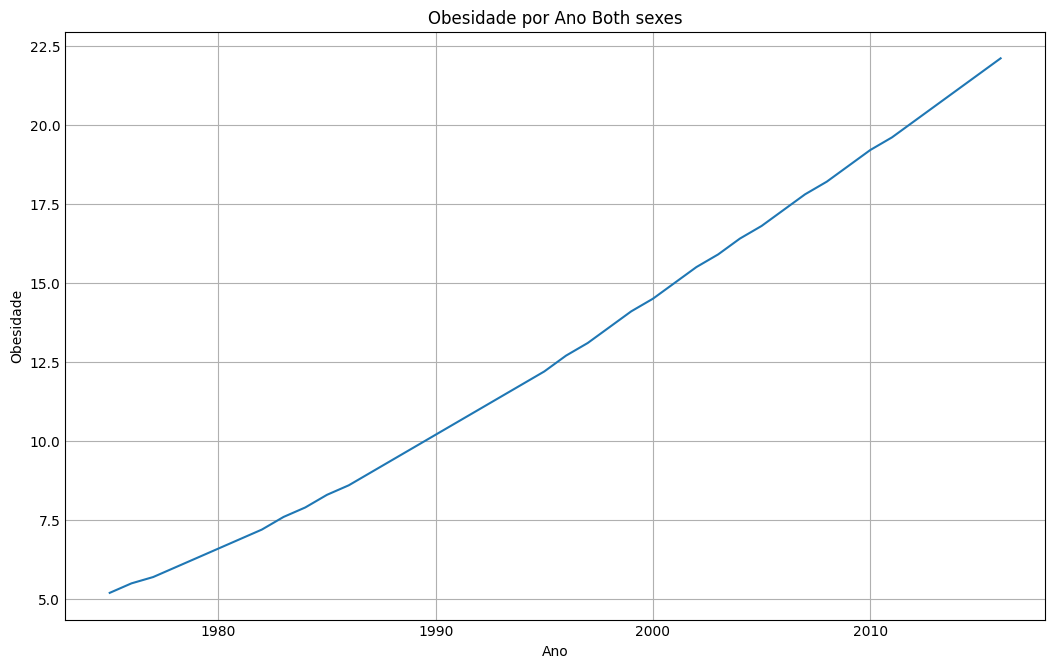

In [159]:
df_obesidade_brasil_Both_sexes = df_obesidade_brasil[df_obesidade_brasil.loc[:,'Sex'] == 'Both sexes']
plt.figure(figsize=(10, 6))
plt.plot(df_obesidade_brasil_Both_sexes["Year"], df_obesidade_brasil_Both_sexes["Obesity (%)"])
plt.title("Obesidade por Ano Both sexes")
plt.xlabel("Ano")
plt.ylabel("Obesidade")
plt.grid(True)
plt.show()  
